In [73]:
import os
import sys

import matplotlib.pyplot as plt
import netron
import torch
import torch.onnx as onnx
from torch.autograd import Variable
from torchvision.models import resnet18
import scienceplots

In [74]:
plt.style.use(['science', 'grid'])

In [31]:
sys.path.append('/Users/crinstaniev/Courses/STATS402/src')

In [33]:
from core.model.encoders.multimodal_encoder import MultimodalEncoder

In [51]:
encoder = MultimodalEncoder(ts_num_features=20)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [70]:
image_sample = torch.randn(32, 3, 224, 224)
text_sample = [
    'This is a sample text to test the MultimodalEncoder module.'
    for _ in range(32)
]  # (batch_size, x)
# (batch_size, timesteps, num_features)
ts_sample = torch.randn(32, 500, 20)

In [87]:
with torch.no_grad():
    output = encoder(ts_sample, image_sample, text_sample)

size: torch.Size([32, 500, 20])


In [88]:
output.shape

torch.Size([32, 6144])

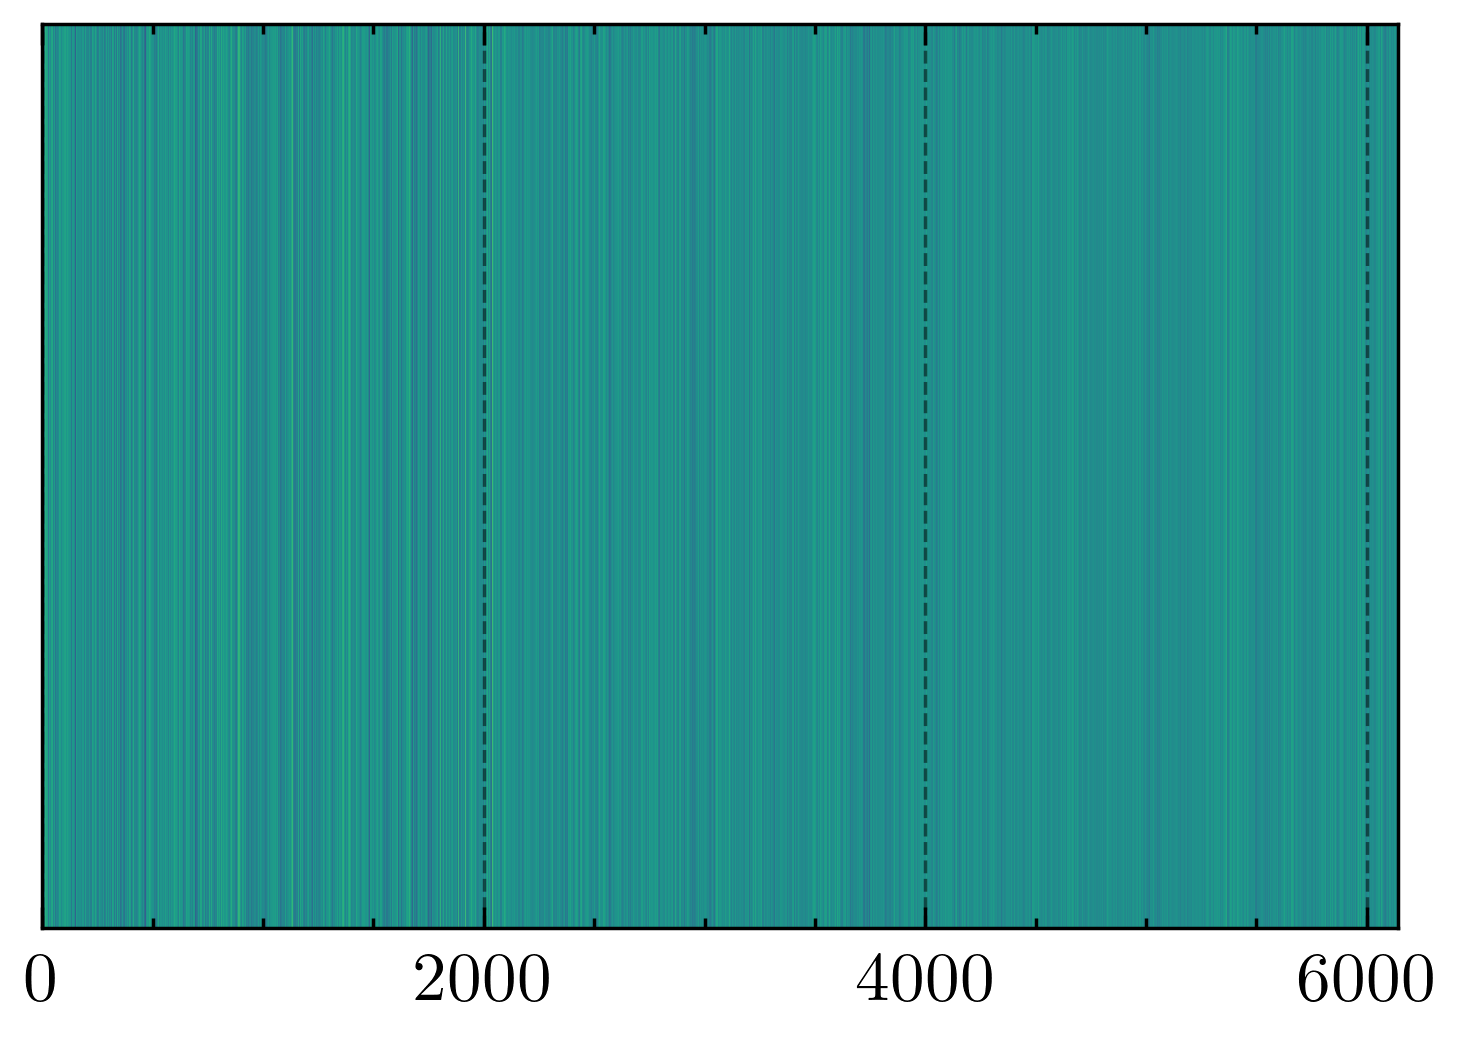

In [102]:
plt.figure(dpi=500)

# Select one signal to visualize
signal = output[0]

plt.imshow([
    output[0].numpy() for _ in range(4096)
    ])

# hide axis labels
plt.yticks([])
plt.show()


In [103]:
from core.model.decision_network.network import DecisionNetwork

In [112]:
model = DecisionNetwork(
    encode_feature_dim=2048 * 3,
    ts_timestep=64,
    manual_feature_dim=16,
    ts_dim=8
)

In [113]:
model

DecisionNetwork(
  (transformer_encoder_layer): TransformerEncoderLayer(
    (self_attn): MultiheadAttention(
      (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
    )
    (linear1): Linear(in_features=8, out_features=2048, bias=True)
    (dropout): Dropout(p=0.1, inplace=False)
    (linear2): Linear(in_features=2048, out_features=8, bias=True)
    (norm1): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
    (norm2): LayerNorm((8,), eps=1e-05, elementwise_affine=True)
    (dropout1): Dropout(p=0.1, inplace=False)
    (dropout2): Dropout(p=0.1, inplace=False)
  )
  (transformer_encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=8, out_features=8, bias=True)
        )
        (linear1): Linear(in_features=8, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
       

In [114]:
import pandas as pd

In [115]:
data = pd.read_json('data/raw/Decentraland/time_series.json')

In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   slug         212 non-null    object        
 1   granularity  212 non-null    object        
 2   timestamps   212 non-null    datetime64[ns]
 3   floorEth     212 non-null    float64       
 4   floorUsd     212 non-null    float64       
 5   salesCount   212 non-null    int64         
 6   volumeEth    212 non-null    float64       
 7   volumeUsd    212 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 13.4+ KB
